In [198]:
import pandas as pd
import os
from pathlib import Path  # Add this line

# Data

## Data from GitHub

In [199]:
BASE = "https://raw.githubusercontent.com/DieckmannDaniel/Git_energy_model/refs/heads/main/results_v2"

FILES = {
    "cost_breakdown.csv": "\t",
    "end_use.csv": "\t",
    "energy_output.csv": "\t",
    "gwp_breakdown.csv": "\t",
    "installed_technologies.csv": "\t",
    "losses.csv": "\t",
    "monthly_operation.csv": "\t",
    "performance.csv": "\t",
    "shares.csv": "\t",
    "storage.csv": "\t",
    "sankey/input2sankey.csv": ",",  # comma-separated, subfolder
}

def download_run_data(run_name: str, base: str = BASE) -> dict:
    """
    Downloads all model CSVs for a given run name into pandas DataFrames.
    Returns a dict like:
    {
        'TOTEX_min_baseline_cost_breakdown': DataFrame,
        'TOTEX_min_baseline_end_use': DataFrame,
        ...
    }
    """
    dfs = {}
    for rel_path, sep in FILES.items():
        url = f"{base.rstrip('/')}/{run_name}/{rel_path}"
        key = f"{run_name}_{Path(rel_path).stem}"  # e.g. TOTEX_min_baseline_cost_breakdown
        try:
            df = pd.read_csv(url, sep=sep, header=0)
            dfs[key] = df
            print(f"✅ Loaded: {key}")
        except Exception as e:
            print(f"[WARN] Could not load {url}: {e}")
    return dfs


In [309]:
list_of_models = ["Task3_baseline_GWP_results", 
                  "Task4_GWP_1_results" , 
                  "Task4_GWP_2_results" , 
                  "Task4_GWP_3_results" , 
                  "Task4_GWP_4_results" , 
                  "Task4_GWP_5_results", 
                  "Task4_GWP_6_results", 
                  "Task3_baseline_TOTEX_results", 
                  "Task4_TOTEX_1_results",
                  "Task4_TOTEX_2_results",
                  "Task4_TOTEX_3_results",
                  "Task4_TOTEX_4_results",
                  "Task4_TOTEX_5_results",
                  "Task4_TOTEX_6_results"
                 ]

In [201]:
if __name__ == "__main__":
    runs = list_of_models



    all_data = {}
    for run in runs:
        all_data.update(download_run_data(run))

✅ Loaded: Task3_baseline_GWP_results_cost_breakdown
✅ Loaded: Task3_baseline_GWP_results_end_use
✅ Loaded: Task3_baseline_GWP_results_energy_output
✅ Loaded: Task3_baseline_GWP_results_gwp_breakdown
✅ Loaded: Task3_baseline_GWP_results_installed_technologies
✅ Loaded: Task3_baseline_GWP_results_losses
✅ Loaded: Task3_baseline_GWP_results_monthly_operation
✅ Loaded: Task3_baseline_GWP_results_performance
✅ Loaded: Task3_baseline_GWP_results_shares
✅ Loaded: Task3_baseline_GWP_results_storage
✅ Loaded: Task3_baseline_GWP_results_input2sankey
✅ Loaded: Task4_GWP_1_results_cost_breakdown
✅ Loaded: Task4_GWP_1_results_end_use
✅ Loaded: Task4_GWP_1_results_energy_output
✅ Loaded: Task4_GWP_1_results_gwp_breakdown
✅ Loaded: Task4_GWP_1_results_installed_technologies
✅ Loaded: Task4_GWP_1_results_losses
✅ Loaded: Task4_GWP_1_results_monthly_operation
✅ Loaded: Task4_GWP_1_results_performance
✅ Loaded: Task4_GWP_1_results_shares
✅ Loaded: Task4_GWP_1_results_storage
✅ Loaded: Task4_GWP_1_result

In [202]:
all_data

{'Task3_baseline_GWP_results_cost_breakdown':             Technology  C_inv [MCHF/y]  C_maint [MCHF/y]
 0                   PV     2175.173458       1820.800000
 1                 WIND      743.561476        169.460000
 2            HYDRO_DAM     1905.444566         35.780227
 3          HYDRO_RIVER     1749.298078        503.580000
 4      GEOTHERMAL_ELEC      420.879312        325.500000
 5       IND_BOILER_GAS       17.289641          4.482037
 6      IND_BOILER_WOOD       17.654147          4.569264
 7     IND_BOILER_WASTE       19.872672          5.143465
 8      IND_HEATER_ELEC      119.209871          6.356705
 9          DHN_HP_ELEC       93.209964         55.096023
 10      DHN_BOILER_GAS        8.214414          2.129443
 11      DHN_GEOTHERMAL      388.662748        274.904726
 12         DEC_HP_ELEC      351.151353        203.268576
 13  DEC_THERMAL_HP_GAS       11.750419          5.140223
 14      DEC_BOILER_GAS       47.275393         18.429684
 15      DEC_BOILER_OIL    

## Energy and tax data

In [253]:
import pandas as pd

# ---------------------------------------------
# 1) Input data
# ---------------------------------------------
resources = [
    "ELECTRICITY","GASOLINE","DIESEL","OIL","NG","NG_CCS",
    "WOOD","COAL","COAL_CCS","URANIUM","WASTE","H2",
]

cost_no_tax_CHF_kWh = [
    0.09, 0.088, 0.085, 0.079, 0.035, 0.035,
    0.093, 0.03, 0.03, 0.004, 0.0000001, 0.16
]

carbon_content_kgCO2_kWh = [
    0.01, 0.35, 0.32, 0.31, 0.27, 0.027,
    0.012, 0.4, 0.04, 0.004, 0.15, 0.0
]

tax_CHF_kg_CO2 = [
    0.12, 0.12, 0.12, 0.12, 0.12, 0.0,
    0.0, 0.12, 0.0, 0.0, 0.0, 0.0
]

# ---------------------------------------------
# 2) Build DataFrame
# ---------------------------------------------
df = pd.DataFrame({
    "Resources": resources,
    "cost_no_tax_CHF_kWh": cost_no_tax_CHF_kWh,
    "carbon_content_kgCO2_kWh": carbon_content_kgCO2_kWh,
    "tax_CHF_kg_CO2": tax_CHF_kg_CO2,
})

# ---------------------------------------------
# 3) Compute cost components
# ---------------------------------------------
df["cost_tax_CHF_kWh"] = df["carbon_content_kgCO2_kWh"] * df["tax_CHF_kg_CO2"]
df["total_cost_CHF_kWh"] = df["cost_no_tax_CHF_kWh"] + df["cost_tax_CHF_kWh"]

# ---------------------------------------------
# 4) Display results
# ---------------------------------------------
energy_cost_df = df.round(6)

In [254]:
energy_cost_df

,Resources,cost_no_tax_CHF_kWh,carbon_content_kgCO2_kWh,tax_CHF_kg_CO2,cost_tax_CHF_kWh,total_cost_CHF_kWh
0,ELECTRICITY,0.090,0.010,0.12,0.0012,0.0912
1,GASOLINE,0.088,0.350,0.12,0.0420,0.1300
2,DIESEL,0.085,0.320,0.12,0.0384,0.1234
3,OIL,0.079,0.310,0.12,0.0372,0.1162
4,NG,0.035,0.270,0.12,0.0324,0.0674
5,NG_CCS,0.035,0.027,0.00,0.0000,0.0350
6,WOOD,0.093,0.012,0.00,0.0000,0.0930
7,COAL,0.030,0.400,0.12,0.0480,0.0780
8,COAL_CCS,0.030,0.040,0.00,0.0000,0.0300
9,URANIUM,0.004,0.004,0.00,0.0000,0.0040


# Functions

## CAPEX/GWP Comparison

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, Iterable, Optional, Tuple

def compare_performance(
    all_data: Dict[str, pd.DataFrame],
    models: Iterable[str],
    figsize: Tuple[float, float] = (11, 4.5),
    show: bool = True,
    return_summary: bool = True,
):

    # --- helpers ---
    def grab_metrics(df: pd.DataFrame) -> dict:
        """Return CAPEX/OPEX/TOTEX and GWP parts from a performance table."""
        # find indicator column, drop any repeated header rows
        ind = next((c for c in df.columns if "indicator" in c.lower()), df.columns[0])
        clean = df[df[ind].astype(str).str.lower() != "indicator"].copy()

        # pick the first non-indicator column that has numbers
        val_cols = [c for c in df.columns if c != ind]

        def get(indicator, default=0.0):
            rows = clean[clean[ind].astype(str).str.strip() == indicator]
            if rows.empty:
                return default
            for c in val_cols:
                s = pd.to_numeric(rows[c], errors="coerce")
                if s.notna().any():
                    return float(s.dropna().iloc[0])
            return default

        return {
            "CAPEX [MCHF/y]":               get("CAPEX"),
            "OPEX [MCHF/y]":                get("OPEX"),
            "TOTEX [MCHF/y]":               get("TOTEX"),
            "GWP_construction [ktCO2e/y]":  get("GWP_construction"),
            "GWP_op [ktCO2e/y]":            get("GWP_op"),
            "GWP_total [ktCO2e/y]":         get("GWP_total"),
        }

    # --- select models to use ---
    models = list(models)
    
    # Build keys with _performance suffix
    keys = {m: f"{m}_performance" for m in models}
    missing = [k for k in keys.values() if k not in all_data]
    if missing:
        raise KeyError(
            f"Missing key(s) in all_data: {', '.join(missing)}. "
            f"Available keys: {list(all_data.keys())}"
        )

    # --- retrieve & summarize ---
    rows = []
    for m in models:
        df = all_data[keys[m]]
        metrics = grab_metrics(df)
        metrics["Model"] = m
        rows.append(metrics)

    cost_GWP_breakdown_df = pd.DataFrame(rows).set_index("Model")

    # --- visualize ---
    model_names = cost_GWP_breakdown_df.index.tolist()
    x = range(len(model_names))
    bar_w = 0.6

    fig, (ax_cost, ax_gwp) = plt.subplots(1, 2, figsize=figsize)

    # Costs: CAPEX + OPEX
    capex = cost_GWP_breakdown_df["CAPEX [MCHF/y]"].astype(float).values
    opex  = cost_GWP_breakdown_df["OPEX [MCHF/y]"].astype(float).values
    b1 = ax_cost.bar(x, capex, width=bar_w)
    b2 = ax_cost.bar(x, opex,  width=bar_w, bottom=capex)
    ax_cost.set_xticks(list(x))
    ax_cost.set_xticklabels(model_names, rotation=0)
    ax_cost.set_title("Costs (CAPEX + OPEX)")
    ax_cost.set_ylabel("MCHF / year")
    ax_cost.legend([b1, b2], ["CAPEX", "OPEX"], loc="upper left")
    ax_cost.grid(axis="y", linestyle=":", alpha=0.5)

    # GWP: construction + operation
    gwp_c = cost_GWP_breakdown_df["GWP_construction [ktCO2e/y]"].astype(float).values
    gwp_o = cost_GWP_breakdown_df["GWP_op [ktCO2e/y]"].astype(float).values
    g1 = ax_gwp.bar(x, gwp_c, width=bar_w)
    g2 = ax_gwp.bar(x, gwp_o, width=bar_w, bottom=gwp_c)
    ax_gwp.set_xticks(list(x))
    ax_gwp.set_xticklabels(model_names, rotation=0)
    ax_gwp.set_title("GWP (construction + operation)")
    ax_gwp.set_ylabel("ktCO₂e / year")
    ax_gwp.legend([g1, g2], ["GWP construction", "GWP operation"], loc="upper left")
    ax_gwp.grid(axis="y", linestyle=":", alpha=0.5)


    plt.tight_layout()
    if show:
        plt.show()

    return (fig, (ax_cost, ax_gwp), cost_GWP_breakdown_df) if return_summary else (fig, (ax_cost, ax_gwp))


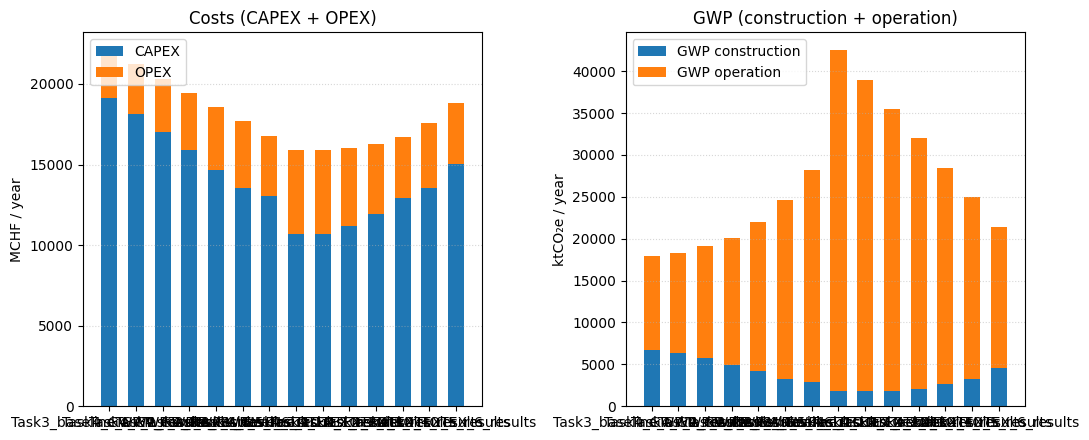

In [256]:
#list_of_models = ["Task3_baseline_GWP_results", "Task3_baseline_TOTEX_results", "Task4_GWP_1_results"]


fig, (ax_cost, ax_gwp), cost_GWP_breakdown_T_df = compare_performance(
    all_data,
    models=list_of_models,
)



In [257]:
cost_GWP_breakdown_T_df

,CAPEX [MCHF/y],OPEX [MCHF/y],TOTEX [MCHF/y],GWP_construction [ktCO2e/y],GWP_op [ktCO2e/y],GWP_total [ktCO2e/y]
Model,,,,,,
Task3_baseline_GWP_results,19145.74,2954.72,22100.46,6690.93,11246.88,17937.81
Task4_GWP_1_results,18127.96,3088.46,21216.41,6402.38,11928.59,18330.97
Task4_GWP_2_results,17030.56,3301.81,20332.37,5729.12,13344.50,19073.62
Task4_GWP_3_results,15904.21,3544.11,19448.32,4907.18,15213.73,20120.91
Task4_GWP_4_results,14673.20,3891.08,18564.28,4213.82,17788.05,22001.87
Task4_GWP_5_results,13513.35,4166.88,17680.23,3280.64,21312.37,24593.01
Task4_GWP_6_results,13044.02,3752.16,16796.19,2825.84,25328.52,28154.36
Task3_baseline_TOTEX_results,10663.18,5248.96,15912.14,1768.57,40739.01,42507.58
Task4_TOTEX_1_results,10711.52,5212.82,15924.34,1780.23,37217.38,38997.61


In [258]:
cost_GWP_breakdown_df = cost_GWP_breakdown_T_df.T
cost_GWP_breakdown_df

Model,Task3_baseline_GWP_results,Task4_GWP_1_results,Task4_GWP_2_results,Task4_GWP_3_results,Task4_GWP_4_results,Task4_GWP_5_results,Task4_GWP_6_results,Task3_baseline_TOTEX_results,Task4_TOTEX_1_results,Task4_TOTEX_2_results,Task4_TOTEX_3_results,Task4_TOTEX_4_results,Task4_TOTEX_5_results,Task4_TOTEX_6_results
CAPEX [MCHF/y],19145.74,18127.96,17030.56,15904.21,14673.20,13513.35,13044.02,10663.18,10711.52,11209.17,11911.19,12926.74,13549.06,15023.24
OPEX [MCHF/y],2954.72,3088.46,3301.81,3544.11,3891.08,4166.88,3752.16,5248.96,5212.82,4787.39,4356.12,3810.31,4037.69,3776.89
TOTEX [MCHF/y],22100.46,21216.41,20332.37,19448.32,18564.28,17680.23,16796.19,15912.14,15924.34,15996.57,16267.31,16737.05,17586.75,18800.13
GWP_construction [ktCO2e/y],6690.93,6402.38,5729.12,4907.18,4213.82,3280.64,2825.84,1768.57,1780.23,1865.81,1989.97,2690.62,3290.82,4540.63
GWP_op [ktCO2e/y],11246.88,11928.59,13344.50,15213.73,17788.05,21312.37,25328.52,40739.01,37217.38,33621.83,29987.71,25777.09,21666.93,16907.14
GWP_total [ktCO2e/y],17937.81,18330.97,19073.62,20120.91,22001.87,24593.01,28154.36,42507.58,38997.61,35487.65,31977.68,28467.71,24957.74,21447.78


## Create Table of Installed Capacities

In [259]:
from functools import reduce
import pandas as pd


def compare_installed_technologies(
    all_data: dict,
    models: list,
    cap_col: str = "Installed capacity [GW]"
):
    """
    Compare installed technologies across multiple model outputs from all_data dict.

    Parameters
    ----------
    all_data : dict
        Dictionary containing all downloaded dataframes.
    models : list[str]
        List of model names (e.g., ["Task3_baseline_GWP_results", "Task3_baseline_TOTEX_results"]).
    cap_col : str, optional
        Column name for installed capacity (default: "Installed capacity [GW]").

    Returns
    -------
    merged : pandas.DataFrame
        DataFrame with installed capacities for all models, aligned by technology.
    """
    
    # Technology order
    tech_order = [
        "IND_BOILER_GAS", "IND_BOILER_OIL", "IND_HEATER_ELEC", "DEC_BOILER_GAS", "DEC_BOILER_OIL",
        "DEC_HEATER_ELEC", "CAR_GASOLINE", "CAR_DIESEL", "CAR_NG", "CAR_PHEV", "CAR_BEV", "CAR_FC",
        "BUS_DIESEL", "BUS_NG", "BUS_FC", "TRAIN_PUBLIC", "TRAIN_FREIGHT",
        "TRUCK_FREIGHT_DIESEL", "TRUCK_FREIGHT_FC", "CCGT", "CCGT_CCS", "COAL_COMBUSTION",
        "COAL_IGCC", "COAL_COMBUSTION_CCS", "COAL_IGCC_CCS", "IND_BOILER_COAL", "NUCLEAR",
        "IND_COGEN_GAS", "DEC_COGEN_GAS", "DEC_COGEN_OIL", "DHN_COGEN_GAS", "DHN_BOILER_GAS",
        "DHN_BOILER_OIL", "DEC_HP_ELEC", "DHN_HP_ELEC", "DEC_THERMAL_HP_GAS", "GEOTHERMAL_ELEC",
        "DHN_GEOTHERMAL", "HYDRO_DAM", "HYDRO_RIVER", "WIND", "PV", "THERMAL_SOLAR",
        "IND_BOILER_WOOD", "IND_BOILER_WASTE", "IND_COGEN_WOOD", "IND_COGEN_WASTE",
        "DHN_BOILER_WOOD", "DEC_BOILER_WOOD", "DHN_COGEN_WOOD", "DHN_COGEN_WASTE",
        "GASIFICATION_SNG", "PYROLYSIS", "DEC_COGEN_H2", "H2_ELECTROLYSIS", "H2_FROM_GAS",
        "H2_FROM_BIOMASS", "P2G_STORAGE", "P2G_INVESTMENT", "POWER_TO_GAS_EFF", "GAS_TO_POWER_EFF"
    ]
    
    # Get installed_technologies dataframes for each model
    keys = {m: f"{m}_installed_technologies" for m in models}
    missing = [k for k in keys.values() if k not in all_data]
    if missing:
        raise KeyError(
            f"Missing key(s) in all_data: {', '.join(missing)}. "
            f"Available keys: {list(all_data.keys())}"
        )
    
    # Select and rename columns for each model
    selected = []
    for m in models:
        df = all_data[keys[m]]
        if "Technology" not in df.columns or cap_col not in df.columns:
            raise KeyError(
                f"Model '{m}' installed_technologies must contain columns 'Technology' and '{cap_col}'. "
                f"Columns found: {list(df.columns)}"
            )
        part = df[["Technology", cap_col]].rename(columns={cap_col: m})
        selected.append(part)
    
    # Merge (N-way outer join on Technology)
    merged = reduce(
        lambda left, right: pd.merge(left, right, on="Technology", how="outer"),
        selected
    )
    
    # Reorder by tech_order
    merged = merged.set_index("Technology").reindex(tech_order).reset_index()
    
    # Drop empty rows
    value_cols = [c for c in merged.columns if c != "Technology"]
    merged = merged.dropna(subset=value_cols, how="all")
    
    return merged


In [260]:
installed_technologies_df = compare_installed_technologies(
    all_data,
    models=list_of_models)

installed_technologies_df


,Technology,Task3_baseline_GWP_results,Task4_GWP_1_results,Task4_GWP_2_results,Task4_GWP_3_results,Task4_GWP_4_results,Task4_GWP_5_results,Task4_GWP_6_results,Task3_baseline_TOTEX_results,Task4_TOTEX_1_results,Task4_TOTEX_2_results,Task4_TOTEX_3_results,Task4_TOTEX_4_results,Task4_TOTEX_5_results,Task4_TOTEX_6_results
0,IND_BOILER_GAS,3.557172,2.373273,2.124723,1.618938,1.090847,1.671458,2.400100,1.063726,2.493640,2.666271,2.432341,1.913007,1.880891,1.117243
2,IND_HEATER_ELEC,3.948264,1.574991,2.293295,2.560213,2.460755,2.366616,2.325244,NaN,NaN,NaN,0.357528,2.312624,2.366616,2.492074
3,DEC_BOILER_GAS,3.613664,3.599663,3.590464,3.590464,3.822534,3.935876,3.935876,13.284044,13.278973,4.896010,3.935876,3.935876,3.935876,3.822534
4,DEC_BOILER_OIL,1.806832,1.799832,1.795232,1.795232,1.911267,1.967938,1.967938,1.967938,1.967938,1.967938,1.967938,1.967938,1.967938,1.911267
6,CAR_GASOLINE,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590
7,CAR_DIESEL,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590
8,CAR_NG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.592295,0.592295,0.592295,NaN,NaN,NaN,NaN
9,CAR_PHEV,0.592295,0.592295,0.592295,0.592295,0.592295,0.592295,0.592295,NaN,NaN,NaN,0.592295,0.592295,0.592295,0.592295
10,CAR_BEV,1.776884,1.776884,1.776884,1.776884,1.776884,1.776884,1.776884,1.776884,1.776884,1.776884,1.776884,1.776884,1.776884,1.776884
11,CAR_FC,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590,1.184590


In [261]:
import pandas as pd
import numpy as np

def group_technologies(df):
    """
    Groups technologies into categories and sums their values.
    
    Parameters:
    df: DataFrame with 'Technology' column and any number of result columns
    
    Returns:
    DataFrame with categories and summed values
    """
    
    # Define category mappings with units
    category_mapping = {
        'PV [GW]': ['PV'],
        'Wind [GW]': ['WIND'],
        'Hydro Dam [GW]': ['HYDRO_DAM'],
        'Hydro River [GW]': ['HYDRO_RIVER'],
        'Geothermal [GW]': ['GEOTHERMAL_ELEC', 'DHN_GEOTHERMAL'],
        'Cogeneration [GW]': ['DHN_COGEN_GAS', 'IND_COGEN_WOOD', 'IND_COGEN_WASTE', 'DHN_COGEN_WOOD', 'DHN_COGEN_WASTE'],
        'Boilers [GW]': ['IND_BOILER_GAS', 'DEC_BOILER_GAS', 'DEC_BOILER_OIL', 'IND_BOILER_COAL', 
                    'DHN_BOILER_GAS', 'DHN_BOILER_OIL', 'IND_BOILER_WOOD', 'IND_BOILER_WASTE'],
        'Ind. Elec. Heaters [GW]': ['IND_HEATER_ELEC'],
        'Heatpump Electric [GW]': ['DEC_HP_ELEC', 'DHN_HP_ELEC'],
        'Heatpump Gas [GW]': ['DEC_THERMAL_HP_GAS'],
        'Thermal Solar [GW]': ['THERMAL_SOLAR'],
        'P2G [GWh]': ['P2G_INVESTMENT'],
        'Electrolysis [GW]': ['H2_ELECTROLYSIS'],
        'Pyrolysis [GW]': ['PYROLYSIS'],
        'H2 from Gas [GW]': ['H2_FROM_GAS'],
        'CCGT [GW]': ['CCGT'],
        'Car Combustion [Mpkm/h]': ['CAR_GASOLINE', 'CAR_DIESEL'],
        'Car NG [Mpkm/h]': ['CAR_NG'],
        'Car PHEV [Mpkm/h]': ['CAR_PHEV'],
        'Car BEV [Mpkm/h]': ['CAR_BEV'],
        'Car FC [Mpkm/h]': ['CAR_FC'],
        'Bus NG [Mpkm/h]': ['BUS_NG'],
        'Bus FC [Mpkm/h]': ['BUS_FC'],
        'Train Public [Mpkm/h]': ['TRAIN_PUBLIC'],
        'Train Freight [Mtkm/h]': ['TRAIN_FREIGHT'],
        'Truck Freight FC [Mtkm/h]': ['TRUCK_FREIGHT_FC']
    }
    
    # Make a copy of the dataframe to avoid modifying the original
    df_copy = df.copy()
    
    # Convert all columns except 'Technology' to numeric
    for col in df_copy.columns:
        if col != 'Technology':
            df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')
    
    # Get all numeric column names except 'Technology'
    value_columns = [col for col in df_copy.columns if col != 'Technology']
    
    # Create new dataframe
    new_data = []
    for category, technologies in category_mapping.items():
        # Filter df for these technologies
        subset = df_copy[df_copy['Technology'].isin(technologies)]
        
        # Create a dictionary for this row
        row_data = {'Category': category}
        
        # Sum each value column
        for col in value_columns:
            row_data[col] = subset[col].sum()
        
        new_data.append(row_data)
    
    new_df = pd.DataFrame(new_data)
    return new_df

# Usage:
technology_capacity_df = group_technologies(installed_technologies_df)
technology_capacity_df

,Category,Task3_baseline_GWP_results,Task4_GWP_1_results,Task4_GWP_2_results,Task4_GWP_3_results,Task4_GWP_4_results,Task4_GWP_5_results,Task4_GWP_6_results,Task3_baseline_TOTEX_results,Task4_TOTEX_1_results,Task4_TOTEX_2_results,Task4_TOTEX_3_results,Task4_TOTEX_4_results,Task4_TOTEX_5_results,Task4_TOTEX_6_results
0,PV [GW],56.900000,53.651290,49.593676,43.256611,35.108400,23.388734,17.763680,7.836600,7.836600,7.836600,7.836600,16.047873,23.388734,39.366669
1,Wind [GW],7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000
2,Hydro Dam [GW],12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701
3,Hydro River [GW],6.600000,6.600000,6.600000,6.600000,6.600000,6.600000,6.600000,4.302699,4.302699,4.302699,5.247338,6.600000,6.600000,6.600000
4,Geothermal [GW],5.274122,4.765085,3.952669,2.903333,2.079893,1.734840,1.734840,1.666911,1.666149,1.666149,1.727421,1.734840,1.734840,2.079893
5,Cogeneration [GW],0.629600,0.629600,0.629600,0.629600,0.629600,0.629600,0.629600,1.032410,1.009343,0.975730,0.629600,0.629600,0.629600,0.629600
6,Boilers [GW],17.398721,17.168668,19.207873,19.552258,19.859009,20.864476,20.474707,30.435475,30.056052,21.525100,20.528797,19.987614,20.864476,19.750290
7,Ind. Elec. Heaters [GW],3.948264,1.574991,2.293295,2.560213,2.460755,2.366616,2.325244,0.000000,0.000000,0.000000,0.357528,2.312624,2.366616,2.492074
8,Heatpump Electric [GW],13.338536,12.837725,10.856212,10.297600,10.650785,9.435569,9.435569,0.318899,0.340486,8.757063,9.484308,9.435569,9.435569,11.088209
9,Heatpump Gas [GW],0.508430,0.492335,0.481759,0.481759,2.802455,3.935876,3.935876,3.935876,3.935876,3.935876,3.935876,3.935876,3.935876,2.802455


## Make Sankey

In [262]:
import pandas as pd
import plotly.graph_objects as go


def make_sankey(all_data: dict, model_name: str):
    """
    Create and display an interactive Sankey diagram from the all_data dictionary.

    Parameters
    ----------
    all_data : dict
        Dictionary containing all downloaded dataframes.
    model_name : str
        Name of the model/run (e.g., "Task3_baseline_GWP_results").

    Returns
    -------
    fig : plotly.graph_objects.Figure
        The Sankey diagram figure.
    """

    # -----------------------------
    # 1) Get the input2sankey dataframe
    # -----------------------------
    key = f"{model_name}_input2sankey"
    
    if key not in all_data:
        raise KeyError(f"Key '{key}' not found in all_data. Available keys: {list(all_data.keys())}")
    
    df = all_data[key].copy()  # Make a copy to avoid modifying the original

    # -----------------------------
    # 2) Detect columns
    # -----------------------------
    possible_sources = ["source", "from", "src", "origin", "start", "left"]
    possible_targets = ["target", "to", "dst", "destination", "end", "right"]
    possible_values = ["value", "weight", "amount", "count", "size", "flow", "volume"]

    def find_col(possible, columns):
        lower_map = {c.lower(): c for c in columns}
        for name in possible:
            if name in lower_map:
                return lower_map[name]
        # fuzzy match
        for c in columns:
            if any(name in c.lower() for name in possible):
                return c
        return None

    src_col = find_col(possible_sources, df.columns)
    tgt_col = find_col(possible_targets, df.columns)
    val_col = find_col(possible_values, df.columns)

    # Melt if pivoted
    if src_col and (not tgt_col) and df.shape[1] > 2:
        value_cols = [c for c in df.columns if c != src_col]
        melted = df.melt(
            id_vars=[src_col],
            value_vars=value_cols,
            var_name="__target__",
            value_name="__value__"
        )
        melted = melted[melted["__value__"].notna() & (melted["__value__"] != 0)]
        data = melted.rename(columns={src_col: "source", "__target__": "target", "__value__": "value"})
    else:
        # Edge list fallback
        if not src_col or not tgt_col:
            cols = list(df.columns)
            if len(cols) < 2:
                raise ValueError("Need at least two columns for source and target.")
            src_col = src_col or cols[0]
            tgt_col = tgt_col or cols[1]
            if len(cols) >= 3 and val_col is None:
                val_col = cols[2]
        if val_col is None or val_col not in df.columns:
            df["__value__"] = 1
            val_col = "__value__"
        data = df.rename(columns={src_col: "source", tgt_col: "target", val_col: "value"})

    # Clean up
    data = data[["source", "target", "value"]].copy()
    data["value"] = pd.to_numeric(data["value"], errors="coerce").fillna(1)
    data = data[data["value"] > 0]

    if data.empty:
        raise ValueError("No valid (positive) flows found after processing your CSV.")

    # -----------------------------
    # 3) Build node index mapping (FIXED)
    # -----------------------------
    all_nodes = pd.concat([
        pd.Series(data["source"].unique()),
        pd.Series(data["target"].unique())
    ]).unique().tolist()
    
    node_index = {name: i for i, name in enumerate(all_nodes)}
    data["src_idx"] = data["source"].map(node_index)
    data["tgt_idx"] = data["target"].map(node_index)

    # -----------------------------
    # 4) Create the Sankey diagram
    # -----------------------------
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(width=0.5),
            label=all_nodes,
        ),
        link=dict(
            source=data["src_idx"].tolist(),
            target=data["tgt_idx"].tolist(),
            value=data["value"].tolist(),
            label=[f"{s} → {t}" for s, t in zip(data["source"], data["target"])],
        )
    )])

    fig.update_layout(
        title_text=f"Sankey Diagram: {model_name}",
        font_size=12
    )

    return fig


In [263]:
fig = make_sankey(all_data, "Task3_baseline_GWP_results")
fig.show()


## Tax calculation

In [264]:
from functools import reduce
import pandas as pd


def aggregate_cost_across_models(
    all_data: dict,
    models: list,
    cost_col: str = "C_inv [MCHF/y]",
    file_type: str = "cost_breakdown",
):
    """
    Aggregate any cost metric by Technology/Resource for any number of model outputs.

    Parameters
    ----------
    all_data : dict
        Dictionary containing all downloaded dataframes.
    models : list[str]
        List of model names (e.g., ["Task3_baseline_GWP_results", "Task3_baseline_TOTEX_results"]).
    cost_col : str, optional
        Column name to read for the cost metric (default: "C_inv [MCHF/y]").
        Can be any column like "C_maint [MCHF/y]", "C_op [MCHF/y]", etc.
    file_type : str, optional
        Type of file to read (default: "cost_breakdown").

    Returns
    -------
    merged : pandas.DataFrame
        A table with rows as technologies/resources (ordered by REQUIRED_TECHS)
        and one column per model containing the selected cost metric.
    """

    # -----------------------------
    # 1) Get dataframes
    # -----------------------------
    keys = {m: f"{m}_{file_type}" for m in models}
    missing = [k for k in keys.values() if k not in all_data]
    if missing:
        raise KeyError(
            f"Missing key(s) in all_data: {', '.join(missing)}. "
            f"Available keys: {list(all_data.keys())}"
        )

    frames = {m: all_data[keys[m]] for m in models}

    # -----------------------------
    # 2) Define technology order
    # -----------------------------
    REQUIRED_TECHS = [
        "ELECTRICITY","GASOLINE","DIESEL","OIL","NG","NG_CCS",
        "WOOD","COAL","COAL_CCS","URANIUM","WASTE","H2",
    ]

    # -----------------------------
    # 3) Detect Technology column name
    # -----------------------------
    # Support both "Technology" and "Resources"
    def get_tech_col(df):
        if "Technology" in df.columns:
            return "Technology"
        elif "Resources" in df.columns:
            return "Resources"
        else:
            raise KeyError(f"DataFrame must contain 'Technology' or 'Resources' column. Found: {list(df.columns)}")

    # -----------------------------
    # 4) Select and rename columns
    # -----------------------------
    selected = []
    for m, df in frames.items():
        tech_col = get_tech_col(df)
        
        if cost_col not in df.columns:
            raise KeyError(
                f"Model '{m}' {file_type} must contain column '{cost_col}'. "
                f"Columns found: {list(df.columns)}"
            )
        
        part = (
            df[[tech_col, cost_col]]
            .rename(columns={tech_col: "Technology", cost_col: m})
        )
        selected.append(part)

    # -----------------------------
    # 5) Merge (N-way outer join on Technology)
    # -----------------------------
    merged = reduce(
        lambda left, right: pd.merge(left, right, on="Technology", how="outer"),
        selected
    )

    # -----------------------------
    # 6) Reorder by REQUIRED_TECHS
    # -----------------------------
    merged = (
        merged.set_index("Technology")
        .reindex(REQUIRED_TECHS)
        .reset_index()
    )

    # -----------------------------
    # 7) Drop empty rows
    # -----------------------------
    value_cols = [c for c in merged.columns if c != "Technology"]
    merged = merged.dropna(subset=value_cols, how="all")

    # -----------------------------
    # 8) Rename and return
    # -----------------------------
    merged = merged.rename(columns={"Technology": "Resources"})
    return merged


In [265]:
# Investment costs
resource_use_per_model_df = aggregate_cost_across_models(
    all_data,
    models= list_of_models,
    cost_col="C_inv [MCHF/y]"
)


In [266]:
resource_use_per_model_df

,Resources,Task3_baseline_GWP_results,Task4_GWP_1_results,Task4_GWP_2_results,Task4_GWP_3_results,Task4_GWP_4_results,Task4_GWP_5_results,Task4_GWP_6_results,Task3_baseline_TOTEX_results,Task4_TOTEX_1_results,Task4_TOTEX_2_results,Task4_TOTEX_3_results,Task4_TOTEX_4_results,Task4_TOTEX_5_results,Task4_TOTEX_6_results
1,GASOLINE,474.851763,474.851763,474.851763,474.851763,474.851763,474.851763,474.851763,392.665881,392.665881,392.665881,474.851763,474.851763,474.851763,474.851763
2,DIESEL,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180
3,OIL,264.753846,357.117526,417.809824,417.809824,444.814966,458.004184,458.004184,458.004184,458.004184,458.004184,458.004184,458.004184,458.004184,444.814966
4,NG,623.128040,664.516607,817.189806,1059.497953,1379.471636,1832.809701,2369.333102,3315.398142,3856.369043,3486.767766,2973.303567,2427.481856,1881.750350,1265.279284
6,WOOD,1141.947000,1141.947000,1141.947000,1141.947000,1141.947000,951.237676,NaN,NaN,NaN,NaN,NaN,NaN,773.109071,1141.947000
7,COAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,632.938290,55.825928,NaN,NaN,NaN,NaN,NaN
10,WASTE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [267]:
resource_use_energy_cost_df = pd.merge(resource_use_per_model_df, energy_cost_df, on="Resources", how="left")
resource_use_energy_cost_df

,Resources,Task3_baseline_GWP_results,Task4_GWP_1_results,Task4_GWP_2_results,Task4_GWP_3_results,Task4_GWP_4_results,Task4_GWP_5_results,Task4_GWP_6_results,Task3_baseline_TOTEX_results,Task4_TOTEX_1_results,Task4_TOTEX_2_results,Task4_TOTEX_3_results,Task4_TOTEX_4_results,Task4_TOTEX_5_results,Task4_TOTEX_6_results,cost_no_tax_CHF_kWh,carbon_content_kgCO2_kWh,tax_CHF_kg_CO2,cost_tax_CHF_kWh,total_cost_CHF_kWh
0,GASOLINE,474.851763,474.851763,474.851763,474.851763,474.851763,474.851763,474.851763,392.665881,392.665881,392.665881,474.851763,474.851763,474.851763,474.851763,0.088,0.350,0.12,0.0420,0.1300
1,DIESEL,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,449.843180,0.085,0.320,0.12,0.0384,0.1234
2,OIL,264.753846,357.117526,417.809824,417.809824,444.814966,458.004184,458.004184,458.004184,458.004184,458.004184,458.004184,458.004184,458.004184,444.814966,0.079,0.310,0.12,0.0372,0.1162
3,NG,623.128040,664.516607,817.189806,1059.497953,1379.471636,1832.809701,2369.333102,3315.398142,3856.369043,3486.767766,2973.303567,2427.481856,1881.750350,1265.279284,0.035,0.270,0.12,0.0324,0.0674
4,WOOD,1141.947000,1141.947000,1141.947000,1141.947000,1141.947000,951.237676,NaN,NaN,NaN,NaN,NaN,NaN,773.109071,1141.947000,0.093,0.012,0.00,0.0000,0.0930
5,COAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,632.938290,55.825928,NaN,NaN,NaN,NaN,NaN,0.030,0.400,0.12,0.0480,0.0780
6,WASTE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.150,0.00,0.0000,0.0000


In [293]:
import pandas as pd


def calculate_resource_taxes(
    resource_df: pd.DataFrame,
    models: list,
):
    """
    Calculate tax for each resource across multiple models.

    Parameters
    ----------
    resource_df : pd.DataFrame
        DataFrame containing model columns, "Resources", "total_cost_CHF_kWh", and "cost_tax_CHF_kWh".
    models : list[str]
        List of model column names (e.g., ["Task3_baseline_GWP_results", "Task3_baseline_TOTEX_results"]).

    Returns
    -------
    df_final : pandas.DataFrame
        DataFrame with "Resource" column and one "{model}_tax" column per model.
        Includes a bottom row with "total_tax" as the Resource name and summed taxes per model.
    """
    
    # Check required columns
    required_cols = ["Resources", "total_cost_CHF_kWh", "cost_tax_CHF_kWh"]
    missing = [col for col in required_cols if col not in resource_df.columns]
    if missing:
        raise KeyError(f"resource_df must contain columns: {missing}. Found: {list(resource_df.columns)}")
    
    # Check model columns exist
    missing_models = [m for m in models if m not in resource_df.columns]
    if missing_models:
        raise KeyError(f"Models not found in resource_df: {missing_models}. Available: {list(resource_df.columns)}")
    
    # Make a copy and convert to numeric
    df = resource_df.copy()
    
    # Convert model columns and cost columns to numeric
    for col in models + ["total_cost_CHF_kWh", "cost_tax_CHF_kWh"]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Build result dataframe
    result = {"Resource": df["Resources"]}
    
    for model in models:
        result[f"{model}"] = (
            df[model] / df["total_cost_CHF_kWh"]
        ) * df["cost_tax_CHF_kWh"]
    
    df_final = pd.DataFrame(result)
    
    # Add total row
    total_row = {"Resource": "Resources total tax"}
    for model in models:
        total_row[f"{model}"] = df_final[f"{model}"].sum()
    
    df_final = pd.concat([df_final, pd.DataFrame([total_row])], ignore_index=True)
    
    return df_final

In [294]:
tax_df = calculate_resource_taxes(
    resource_use_energy_cost_df,
    models= list_of_models
)

display(tax_df)


,Resource,Task3_baseline_GWP_results,Task4_GWP_1_results,Task4_GWP_2_results,Task4_GWP_3_results,Task4_GWP_4_results,Task4_GWP_5_results,Task4_GWP_6_results,Task3_baseline_TOTEX_results,Task4_TOTEX_1_results,Task4_TOTEX_2_results,Task4_TOTEX_3_results,Task4_TOTEX_4_results,Task4_TOTEX_5_results,Task4_TOTEX_6_results
0,GASOLINE,153.413647,153.413647,153.413647,153.413647,153.413647,153.413647,153.413647,126.861285,126.861285,126.861285,153.413647,153.413647,153.413647,153.413647
1,DIESEL,139.983615,139.983615,139.983615,139.983615,139.983615,139.983615,139.983615,139.983615,139.983615,139.983615,139.983615,139.983615,139.983615,139.983615
2,OIL,84.757686,114.326781,133.756673,133.756673,142.402037,146.624403,146.624403,146.624403,146.624403,146.624403,146.624403,146.624403,146.624403,142.402037
3,NG,299.545230,319.441218,392.833082,509.313556,663.128798,881.053922,1138.967248,1593.752223,1853.803516,1676.131686,1429.303198,1166.920061,904.580287,608.235145
4,WOOD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
5,COAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,389.500486,34.354417,NaN,NaN,NaN,NaN,NaN
6,WASTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Resources total tax,677.700177,727.165260,819.987017,936.467491,1098.928097,1321.075586,1578.988913,2396.722012,2301.627236,2089.600989,1869.324863,1606.941726,1344.601952,1044.034444


In [315]:
import pandas as pd

def calculate_resource_amounts(all_data: dict, models: list):
    """
    Calculate resource amounts (in GWh/y) for each resource across multiple models.
    
    Parameters
    ----------
    all_data : dict
        Dictionary containing all downloaded dataframes.
    models : list[str]
        List of model names (e.g., ["Task3_baseline_GWP_results", "Task3_baseline_TOTEX_results"]).
    
    Returns
    -------
    df_final : pandas.DataFrame
        DataFrame with "Resource" column and "{model}" columns showing energy amounts.
        Includes a bottom row with "Resources total amount" and summed amounts per model.
    """
    
    # Define the list of resources
    resources = ["GASOLINE", "DIESEL", "OIL", "NG", "WOOD", "COAL", "WASTE"]
    
    # Build result dataframe
    result = {"Resource": resources}
    
    for model in models:
        # Add _energy_output suffix (model already contains _results)
        energy_output_name = f"{model}_energy_output"
        
        # Fetch the DataFrame from all_data
        if energy_output_name not in all_data:
            raise KeyError(f"DataFrame '{energy_output_name}' not found in all_data. Available keys: {list(all_data.keys())}")
        
        energy_output_df = all_data[energy_output_name]
        
        # Create a mapping from resource name to energy amount
        energy_output_df = energy_output_df.copy()
        energy_output_df.columns = ['Resource', 'Amount']
        
        # Convert Amount to numeric
        energy_output_df['Amount'] = pd.to_numeric(energy_output_df['Amount'], errors='coerce')
        
        resource_energy_map = dict(zip(energy_output_df['Resource'], energy_output_df['Amount']))
        
        # Map the amounts to our resources
        result[f"{model}"] = [resource_energy_map.get(res) for res in resources]
    
    df_final = pd.DataFrame(result)
    
    # Convert all model columns to numeric
    for model in models:
        df_final[f"{model}"] = pd.to_numeric(df_final[f"{model}"], errors='coerce')
    
    # Add total row
    total_row = {"Resource": "Resources total amount"}
    for model in models:
        total_row[f"{model}"] = df_final[f"{model}"].sum()
    
    df_final = pd.concat([df_final, pd.DataFrame([total_row])], ignore_index=True)
    
    return df_final

In [317]:
resources_amount_df = calculate_resource_amounts(all_data=all_data, models=list_of_models)

resources_amount_df

,Resource,Task3_baseline_GWP_results,Task4_GWP_1_results,Task4_GWP_2_results,Task4_GWP_3_results,Task4_GWP_4_results,Task4_GWP_5_results,Task4_GWP_6_results,Task3_baseline_TOTEX_results,Task4_TOTEX_1_results,Task4_TOTEX_2_results,Task4_TOTEX_3_results,Task4_TOTEX_4_results,Task4_TOTEX_5_results,Task4_TOTEX_6_results
0,GASOLINE,5396.043,5396.043,5396.043,5396.043,5396.043,5396.043,5396.043,4462.112,4462.112,4462.112,5396.043,5396.043,5396.043,5396.043
1,DIESEL,5292.273,5292.273,5292.273,5292.273,5292.273,5292.273,5292.273,5292.273,5292.273,5292.273,5292.273,5292.273,5292.273,5292.273
2,OIL,3351.315,4520.475,5288.732,5288.732,5630.569,5797.521,5797.521,5797.521,5797.521,5797.521,5797.521,5797.521,5797.521,5630.569
3,NG,17803.658,18986.189,23348.280,30271.370,39413.475,52365.991,67695.231,94725.661,110181.973,99621.936,84951.530,69356.624,53764.296,36150.837
4,WOOD,12279.000,12279.000,12279.000,12279.000,12279.000,10228.362,NaN,NaN,NaN,NaN,NaN,NaN,8313.001,12279.000
5,COAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21097.943,1860.864,NaN,NaN,NaN,NaN,NaN
6,WASTE,11142.000,11142.000,11142.000,11142.000,11142.000,11142.000,11142.000,11142.000,11142.000,11142.000,11142.000,11142.000,11142.000,11142.000
7,Resources total amount,55264.289,57615.980,62746.328,69669.418,79153.360,90222.190,95323.068,142517.510,138736.743,126315.842,112579.367,96984.461,89705.134,75890.722


In [279]:
import pandas as pd


def calculate_resource_amounts(
    resource_df: pd.DataFrame,
    models: list,
):
    """
    Calculate resource amounts (in kWh) for each resource across multiple models.

    Parameters
    ----------
    resource_df : pd.DataFrame
        DataFrame containing model columns, "Resources", and "total_cost_CHF_kWh".
    models : list[str]
        List of model column names representing total costs (e.g., ["Task3_baseline_GWP_results", "Task3_baseline_TOTEX_results"]).

    Returns
    -------
    df_final : pandas.DataFrame
        DataFrame with "Resource" column and "{model}_amount_kWh" columns.
        Includes a bottom row with "total" as the Resource name and summed amounts per model.
    """
    
    # Check required columns
    required_cols = ["Resources", "cost_no_tax_CHF_kWh"]
    missing = [col for col in required_cols if col not in resource_df.columns]
    if missing:
        raise KeyError(f"resource_df must contain columns: {missing}. Found: {list(resource_df.columns)}")
    
    # Check model columns exist
    missing_models = [m for m in models if m not in resource_df.columns]
    if missing_models:
        raise KeyError(f"Models not found in resource_df: {missing_models}. Available: {list(resource_df.columns)}")
    
    # Make a copy and convert to numeric
    df = resource_df.copy()
    
    # Convert model columns and cost column to numeric
    for col in models + ["cost_no_tax_CHF_kWh"]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Build result dataframe
    result = {"Resource": df["Resources"]}
    
    for model in models:
        # Calculate amount in kWh
        result[f"{model}"] = df[model] / df["cost_no_tax_CHF_kWh"]
    
    df_final = pd.DataFrame(result)
    
    # Add total row
    total_row = {"Resource": "Resources total amount"}
    for model in models:
        total_row[f"{model}"] = df_final[f"{model}"].sum()
    
    df_final = pd.concat([df_final, pd.DataFrame([total_row])], ignore_index=True)
    
    return df_final

In [ ]:
# With amounts in kWh
resources_amount_df_via_cost = calculate_resource_amounts(resource_use_energy_cost_df, list_of_models)
resources_amount_df_via_cost

,Resource,Task3_baseline_GWP_results,Task4_GWP_1_results,Task4_GWP_2_results,Task4_GWP_3_results,Task4_GWP_4_results,Task4_GWP_5_results,Task4_GWP_6_results,Task3_baseline_TOTEX_results,Task4_TOTEX_1_results,Task4_TOTEX_2_results,Task4_TOTEX_3_results,Task4_TOTEX_4_results,Task4_TOTEX_5_results,Task4_TOTEX_6_results
0,GASOLINE,5396.042761,5396.042761,5396.042761,5396.042761,5396.042761,5396.042761,5396.042761,4462.112284,4462.112284,4462.112284,5396.042761,5396.042761,5396.042761,5396.042761
1,DIESEL,5292.272706,5292.272706,5292.272706,5292.272706,5292.272706,5292.272706,5292.272706,5292.272706,5292.272706,5292.272706,5292.272706,5292.272706,5292.272706,5292.272706
2,OIL,3351.314506,4520.475013,5288.731949,5288.731949,5630.569190,5797.521316,5797.521316,5797.521316,5797.521316,5797.521316,5797.521316,5797.521316,5797.521316,5630.569190
3,NG,17803.658286,18986.188771,23348.280171,30271.370086,39413.475314,52365.991457,67695.231486,94725.661200,110181.972657,99621.936171,84951.530486,69356.624457,53764.295714,36150.836686
4,WOOD,12279.000000,12279.000000,12279.000000,12279.000000,12279.000000,10228.362108,NaN,NaN,NaN,NaN,NaN,NaN,8313.000763,12279.000000
5,COAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21097.943000,1860.864267,NaN,NaN,NaN,NaN,NaN
6,WASTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Resources total amount,44122.288259,46473.979251,51604.327588,58527.417502,68011.359971,79080.190348,84181.068269,131375.510506,127594.743230,115173.842478,101437.367269,85842.461241,78563.133261,64748.721343


# Data frames

In [318]:
import pandas as pd

def combine_dataframes(technology_df, costs_df):
    """
    Combine technology capacity dataframe with costs/emissions dataframe.
    
    Parameters:
    technology_df: DataFrame with 'Category' column and model result columns
    costs_df: DataFrame with 'Model' as index or column and model result columns
    
    Returns:
    Combined DataFrame with both technology categories and cost/emission metrics
    """
    
    # Make a copy of costs_df
    costs_copy = costs_df.copy()
    
    # Reset index to convert it to a column if it's the index
    costs_copy.reset_index(inplace=True)
    
    # Rename the first column (which should be 'Model' or 'index') to 'Category'
    first_col = costs_copy.columns[0]
    costs_copy.rename(columns={first_col: 'Category'}, inplace=True)
    
    # Remove rows where Category is NaN
    costs_copy = costs_copy.dropna(subset=['Category'])
    
    # Concatenate the two dataframes
    combined_df = pd.concat([technology_df, costs_copy], ignore_index=True)
    
    return combined_df

# Usage:
final_df = combine_dataframes(technology_capacity_df, cost_GWP_breakdown_df)

In [323]:
import pandas as pd

def process_and_combine_resource_data(
    main_df: pd.DataFrame,
    tax_df: pd.DataFrame,
    amount_df: pd.DataFrame,
    models: list
):
    """
    Process resource tax and amount dataframes and combine with main dataframe.
    
    Parameters:
    main_df: Main DataFrame with technology categories and costs/emissions
    tax_df: DataFrame with resource tax values (in MCHF/y)
    amount_df: DataFrame with resource amount values (will be in TWh/y)
    models: List of model column names
    
    Returns:
    Combined DataFrame with all data including OPEX w/o tax calculation
    """
    
    # Make copies
    tax_copy = tax_df.copy()
    amount_copy = amount_df.copy()
    
    # Convert resource names to title case and add units
    # For tax dataframe - add [MCHF/y] unit
    tax_copy['Resource'] = tax_copy['Resource'].str.title()
    tax_copy.loc[tax_copy['Resource'] != 'Total', 'Resource'] = \
        tax_copy.loc[tax_copy['Resource'] != 'Total', 'Resource'] + ' [MCHF/y]'
    tax_copy.loc[tax_copy['Resource'] == 'Total', 'Resource'] = 'Resources Total Tax [MCHF/y]'
    
    # For amount dataframe - add [TWh/y] unit
    amount_copy['Resource'] = amount_copy['Resource'].str.title()
    amount_copy.loc[amount_copy['Resource'] != 'Total', 'Resource'] = \
        amount_copy.loc[amount_copy['Resource'] != 'Total', 'Resource'] + ' [GWh/y]'
    amount_copy.loc[amount_copy['Resource'] == 'Total', 'Resource'] = 'Resources Total Amount [GWh/y]'
    
    # Rename 'Resource' column to 'Category' to match main_df
    tax_copy.rename(columns={'Resource': 'Category'}, inplace=True)
    amount_copy.rename(columns={'Resource': 'Category'}, inplace=True)
    
    # Keep only the model columns and Category column
    tax_copy = tax_copy[['Category'] + models]
    amount_copy = amount_copy[['Category'] + models]
    
    # Concatenate all dataframes
    combined_df = pd.concat([main_df, tax_copy, amount_copy], ignore_index=True)
    
    # Calculate OPEX w/o tax
    # Find OPEX row and Resources Total Tax row
    opex_row = combined_df[combined_df['Category'] == 'OPEX [MCHF/y]']
    total_tax_row = combined_df[combined_df['Category'] == 'Resources Total Tax [MCHF/y]']
    
    if not opex_row.empty and not total_tax_row.empty:
        # Create new row for OPEX w/o tax
        opex_wo_tax = {'Category': 'OPEX w/o tax [MCHF/y]'}
        
        for model in models:
            opex_value = opex_row[model].values[0]
            tax_value = total_tax_row[model].values[0]
            opex_wo_tax[model] = opex_value - tax_value
        
        # Insert OPEX w/o tax right after OPEX
        opex_index = opex_row.index[0]
        opex_wo_tax_df = pd.DataFrame([opex_wo_tax])
        
        # Split dataframe and insert the new row
        combined_df = pd.concat([
            combined_df.iloc[:opex_index + 1],
            opex_wo_tax_df,
            combined_df.iloc[opex_index + 1:]
        ], ignore_index=True)
    
    return combined_df

# Usage:
final_combined_df = process_and_combine_resource_data(
    final_df,  # Your main dataframe from earlier
    tax_df,  # The tax dataframe
    resources_amount_df,  # The amount dataframe
    models= list_of_models
)
final_combined_df

,Category,Task3_baseline_GWP_results,Task4_GWP_1_results,Task4_GWP_2_results,Task4_GWP_3_results,Task4_GWP_4_results,Task4_GWP_5_results,Task4_GWP_6_results,Task3_baseline_TOTEX_results,Task4_TOTEX_1_results,Task4_TOTEX_2_results,Task4_TOTEX_3_results,Task4_TOTEX_4_results,Task4_TOTEX_5_results,Task4_TOTEX_6_results
0,PV [GW],56.900000,53.651290,49.593676,43.256611,35.108400,23.388734,17.763680,7.836600,7.836600,7.836600,7.836600,16.047873,23.388734,39.366669
1,Wind [GW],7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000
2,Hydro Dam [GW],12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701
3,Hydro River [GW],6.600000,6.600000,6.600000,6.600000,6.600000,6.600000,6.600000,4.302699,4.302699,4.302699,5.247338,6.600000,6.600000,6.600000
4,Geothermal [GW],5.274122,4.765085,3.952669,2.903333,2.079893,1.734840,1.734840,1.666911,1.666149,1.666149,1.727421,1.734840,1.734840,2.079893
5,Cogeneration [GW],0.629600,0.629600,0.629600,0.629600,0.629600,0.629600,0.629600,1.032410,1.009343,0.975730,0.629600,0.629600,0.629600,0.629600
6,Boilers [GW],17.398721,17.168668,19.207873,19.552258,19.859009,20.864476,20.474707,30.435475,30.056052,21.525100,20.528797,19.987614,20.864476,19.750290
7,Ind. Elec. Heaters [GW],3.948264,1.574991,2.293295,2.560213,2.460755,2.366616,2.325244,0.000000,0.000000,0.000000,0.357528,2.312624,2.366616,2.492074
8,Heatpump Electric [GW],13.338536,12.837725,10.856212,10.297600,10.650785,9.435569,9.435569,0.318899,0.340486,8.757063,9.484308,9.435569,9.435569,11.088209
9,Heatpump Gas [GW],0.508430,0.492335,0.481759,0.481759,2.802455,3.935876,3.935876,3.935876,3.935876,3.935876,3.935876,3.935876,3.935876,2.802455


In [340]:
pythonfrom IPython.display import FileLink

# Save the file
final_combined_df.to_csv('energy_system_comparison.csv', index=False)

# Create download link
FileLink('energy_system_comparison.csv')

SyntaxError: invalid syntax (1956273276.py, line 1)

In [324]:
list_of_models

['Task3_baseline_GWP_results',
 'Task4_GWP_1_results',
 'Task4_GWP_2_results',
 'Task4_GWP_3_results',
 'Task4_GWP_4_results',
 'Task4_GWP_5_results',
 'Task4_GWP_6_results',
 'Task3_baseline_TOTEX_results',
 'Task4_TOTEX_1_results',
 'Task4_TOTEX_2_results',
 'Task4_TOTEX_3_results',
 'Task4_TOTEX_4_results',
 'Task4_TOTEX_5_results',
 'Task4_TOTEX_6_results']

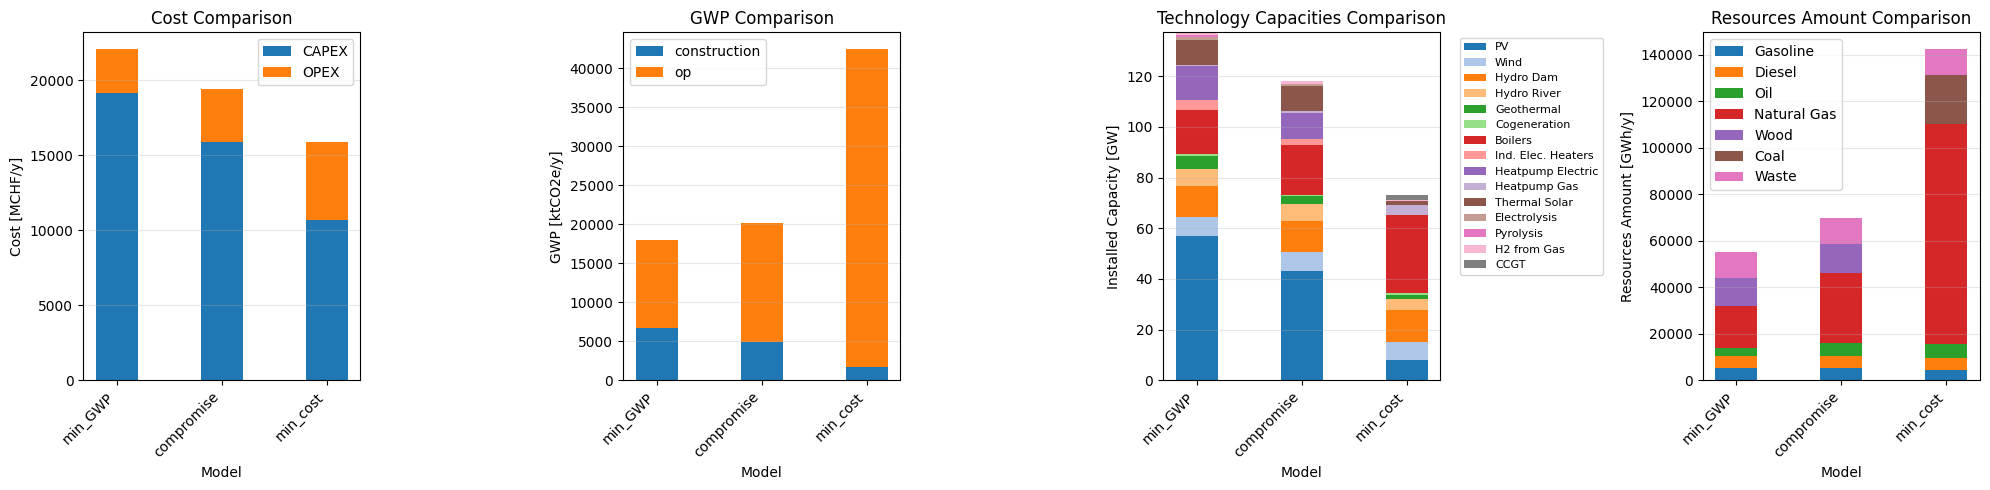

In [335]:
import matplotlib.pyplot as plt
import numpy as np

def create_comparison_charts(df, models):
    """
    Create stacked bar charts comparing models across different categories.
    
    Parameters:
    df: DataFrame with Category column and model result columns
    models: List of model column names
    """
    
    # Define model names for display
    model_display_names = ['min_GWP', 'compromise', 'min_cost']
    
    # Define custom color palette for chart 3 only
    tech_colors = plt.cm.tab20.colors  # Use tab20 colormap for technologies
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    # Bar width
    bar_width = 0.4
    
    # 1. Cost comparison (CAPEX, OPEX) - Stacked
    cost_categories = ['CAPEX [MCHF/y]', 'OPEX [MCHF/y]']
    cost_data = df[df['Category'].isin(cost_categories)]
    
    x = np.arange(len(models))
    bottom = np.zeros(len(models))
    
    for cat in cost_categories:
        values = [cost_data[cost_data['Category'] == cat][model].values[0] 
                  for model in models]
        axes[0].bar(x, values, bar_width, bottom=bottom, label=cat.replace(' [MCHF/y]', ''))
        bottom += values
    
    axes[0].set_xlabel('Model')
    axes[0].set_ylabel('Cost [MCHF/y]')
    axes[0].set_title('Cost Comparison')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(model_display_names, rotation=45, ha='right')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # 2. GWP comparison - Stacked
    gwp_categories = ['GWP_construction [ktCO2e/y]', 'GWP_op [ktCO2e/y]']
    gwp_data = df[df['Category'].isin(gwp_categories)]
    
    x = np.arange(len(models))
    bottom = np.zeros(len(models))
    
    for cat in gwp_categories:
        values = [gwp_data[gwp_data['Category'] == cat][model].values[0] 
                  for model in models]
        label = cat.replace('GWP_', '').replace(' [ktCO2e/y]', '')
        axes[1].bar(x, values, bar_width, bottom=bottom, label=label)
        bottom += values
    
    axes[1].set_xlabel('Model')
    axes[1].set_ylabel('GWP [ktCO2e/y]')
    axes[1].set_title('GWP Comparison')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(model_display_names, rotation=45, ha='right')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    # 3. Installed Technology Capacities - Stacked
    tech_categories = [
        'PV [GW]', 'Wind [GW]', 'Hydro Dam [GW]', 'Hydro River [GW]', 
        'Geothermal [GW]', 'Cogeneration [GW]', 'Boilers [GW]', 
        'Ind. Elec. Heaters [GW]', 'Heatpump Electric [GW]', 
        'Heatpump Gas [GW]', 'Thermal Solar [GW]', 'Electrolysis [GW]', 
        'Pyrolysis [GW]', 'H2 from Gas [GW]', 'CCGT [GW]'
    ]
    tech_data = df[df['Category'].isin(tech_categories)]
    
    x = np.arange(len(models))
    bottom = np.zeros(len(models))
    
    color_idx = 0
    for cat in tech_categories:
        values = [tech_data[tech_data['Category'] == cat][model].values[0] 
                  if not tech_data[tech_data['Category'] == cat].empty else 0
                  for model in models]
        # Replace NaN with 0
        values = [0 if np.isnan(v) else v for v in values]
        # Skip if all values are zero
        if sum(values) > 0:
            label = cat.replace(' [GW]', '')
            axes[2].bar(x, values, bar_width, bottom=bottom, 
                       label=label,
                       color=tech_colors[color_idx % len(tech_colors)])
            bottom += values
            color_idx += 1
    
    axes[2].set_xlabel('Model')
    axes[2].set_ylabel('Installed Capacity [GW]')
    axes[2].set_title('Technology Capacities Comparison')
    axes[2].set_xticks(x)
    axes[2].set_xticklabels(model_display_names, rotation=45, ha='right')
    axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    axes[2].grid(axis='y', alpha=0.3)
    
    # 4. Resources amount comparison - Stacked
    resource_categories = [
        'Gasoline [GWh/y]', 'Diesel [GWh/y]', 'Oil [GWh/y]',
        'Ng [GWh/y]', 'Wood [GWh/y]', 'Coal [GWh/y]', 'Waste [GWh/y]'
    ]
    resource_data = df[df['Category'].isin(resource_categories)]
    
    x = np.arange(len(models))
    bottom = np.zeros(len(models))
    
    for cat in resource_categories:
        values = [resource_data[resource_data['Category'] == cat][model].values[0] 
                  if not resource_data[resource_data['Category'] == cat].empty else 0
                  for model in models]
        # Replace NaN with 0
        values = [0 if np.isnan(v) else v for v in values]
        # Skip if all values are zero
        if sum(values) > 0:
            # Rename Ng to Natural Gas
            label = cat.replace(' [GWh/y]', '').replace('Ng', 'Natural Gas')
            axes[3].bar(x, values, bar_width, bottom=bottom, label=label)
            bottom += values
    
    axes[3].set_xlabel('Model')
    axes[3].set_ylabel('Resources Amount [GWh/y]')
    axes[3].set_title('Resources Amount Comparison')
    axes[3].set_xticks(x)
    axes[3].set_xticklabels(model_display_names, rotation=45, ha='right')
    axes[3].legend()
    axes[3].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Usage:
create_comparison_charts(
    final_combined_df, 
    models=['Task3_baseline_GWP_results',
            "Task4_GWP_3_results",
            'Task3_baseline_TOTEX_results']
)

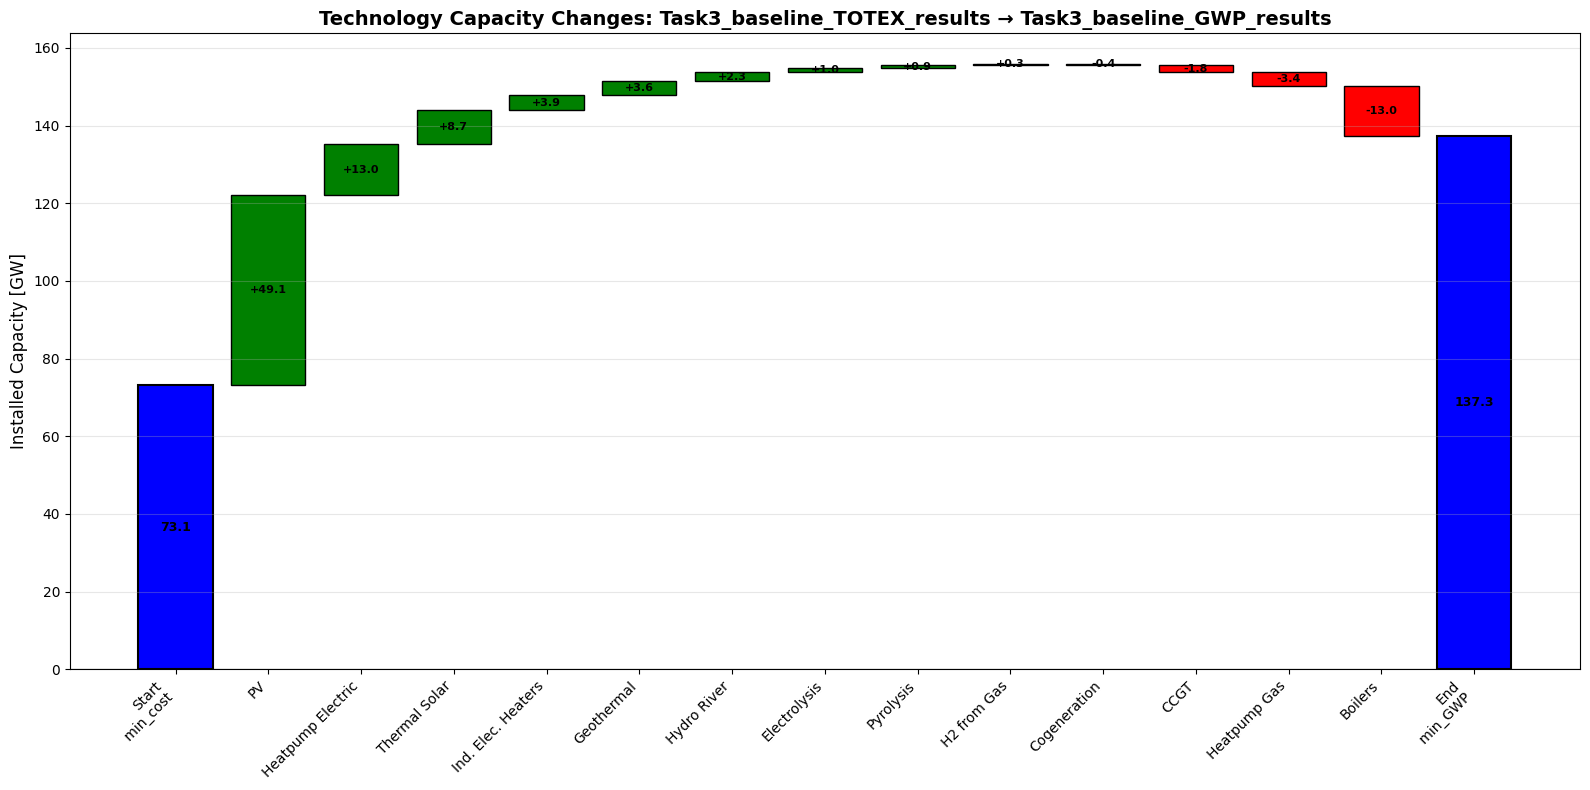

In [330]:
import matplotlib.pyplot as plt
import numpy as np

def create_capacity_waterfall(df, model1, model2, top_n=15):
    """
    Create a waterfall chart showing changes in technology capacities between two models.
    
    Parameters:
    df: DataFrame with Category column and model result columns
    model1: Name of the first model (baseline)
    model2: Name of the second model (comparison)
    top_n: Number of top changes to show (default 15)
    """
    
    # Get technology capacity categories (only GW units)
    tech_categories = [
        'PV [GW]', 'Wind [GW]', 'Hydro Dam [GW]', 'Hydro River [GW]', 
        'Geothermal [GW]', 'Cogeneration [GW]', 'Boilers [GW]', 
        'Ind. Elec. Heaters [GW]', 'Heatpump Electric [GW]', 
        'Heatpump Gas [GW]', 'Thermal Solar [GW]', 'Electrolysis [GW]', 
        'Pyrolysis [GW]', 'H2 from Gas [GW]', 'CCGT [GW]'
    ]
    
    # Calculate changes for each technology
    changes = []
    for cat in tech_categories:
        tech_data = df[df['Category'] == cat]
        if not tech_data.empty:
            val1 = tech_data[model1].values[0]
            val2 = tech_data[model2].values[0]
            change = val2 - val1
            if abs(change) > 0.01:  # Only include meaningful changes
                changes.append({
                    'category': cat.replace(' [GW]', ''),
                    'change': change
                })
    
    # Sort by absolute change and take top N
    changes_sorted = sorted(changes, key=lambda x: abs(x['change']), reverse=True)[:top_n]
    # Re-sort by change value for waterfall (positive then negative)
    changes_sorted = sorted(changes_sorted, key=lambda x: x['change'], reverse=True)
    
    # Calculate starting value (total of model1)
    tech_data = df[df['Category'].isin(tech_categories)]
    start_value = sum([tech_data[tech_data['Category'] == cat][model1].values[0] 
                       if not tech_data[tech_data['Category'] == cat].empty else 0
                       for cat in tech_categories])
    
    # Calculate ending value (total of model2)
    end_value = sum([tech_data[tech_data['Category'] == cat][model2].values[0] 
                     if not tech_data[tech_data['Category'] == cat].empty else 0
                     for cat in tech_categories])
    
    # Prepare waterfall data
    categories = ['Start\n min_cost' ]#+ model1.replace('_', ' ')]
    values = [start_value]
    colors = ['blue']
    
    cumulative = start_value
    for item in changes_sorted:
        categories.append(item['category'])
        values.append(item['change'])
        colors.append('green' if item['change'] > 0 else 'red')
        cumulative += item['change']
    
    categories.append('End\n min_GWP' )#+ model2.replace('_', ' '))
    values.append(end_value)
    colors.append('blue')
    
    # Create waterfall chart
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Calculate positions for bars
    x_pos = np.arange(len(categories))
    
    # Starting bar
    ax.bar(0, values[0], color=colors[0], edgecolor='black', linewidth=1.5)
    
    # Change bars
    cumulative = values[0]
    for i in range(1, len(values) - 1):
        if values[i] >= 0:
            ax.bar(i, values[i], bottom=cumulative, color=colors[i], 
                   edgecolor='black', linewidth=1)
        else:
            ax.bar(i, -values[i], bottom=cumulative + values[i], 
                   color=colors[i], edgecolor='black', linewidth=1)
        
        # Add connector line
        ax.plot([i-0.4, i+0.4], [cumulative, cumulative], 'k--', linewidth=0.5)
        
        cumulative += values[i]
    
    # Ending bar
    ax.bar(len(values)-1, values[-1], color=colors[-1], edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars
    cumulative = values[0]
    ax.text(0, values[0]/2, f'{values[0]:.1f}', ha='center', va='center', 
            fontweight='bold', fontsize=9)
    
    for i in range(1, len(values) - 1):
        if values[i] >= 0:
            label_y = cumulative + values[i]/2
            ax.text(i, label_y, f'+{values[i]:.1f}', ha='center', va='center', 
                    fontsize=8, fontweight='bold')
        else:
            label_y = cumulative + values[i]/2
            ax.text(i, label_y, f'{values[i]:.1f}', ha='center', va='center', 
                    fontsize=8, fontweight='bold')
        cumulative += values[i]
    
    ax.text(len(values)-1, values[-1]/2, f'{values[-1]:.1f}', ha='center', 
            va='center', fontweight='bold', fontsize=9)
    
    # Formatting
    ax.set_xticks(x_pos)
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.set_ylabel('Installed Capacity [GW]', fontsize=12)
    ax.set_title(f'Technology Capacity Changes: {model1} → {model2}', fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    ax.axhline(y=0, color='black', linewidth=0.8)
    
    plt.tight_layout()
    plt.show()

# Usage:
create_capacity_waterfall(
    final_combined_df, 
    model2='Task3_baseline_GWP_results',
    model1='Task3_baseline_TOTEX_results',
    top_n=15
)

In [341]:
final_df

,Category,Task3_baseline_GWP_results,Task4_GWP_1_results,Task4_GWP_2_results,Task4_GWP_3_results,Task4_GWP_4_results,Task4_GWP_5_results,Task4_GWP_6_results,Task3_baseline_TOTEX_results,Task4_TOTEX_1_results,Task4_TOTEX_2_results,Task4_TOTEX_3_results,Task4_TOTEX_4_results,Task4_TOTEX_5_results,Task4_TOTEX_6_results
0,PV [GW],56.900000,53.651290,49.593676,43.256611,35.108400,23.388734,17.763680,7.836600,7.836600,7.836600,7.836600,16.047873,23.388734,39.366669
1,Wind [GW],7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000,7.400000
2,Hydro Dam [GW],12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701,12.380701
3,Hydro River [GW],6.600000,6.600000,6.600000,6.600000,6.600000,6.600000,6.600000,4.302699,4.302699,4.302699,5.247338,6.600000,6.600000,6.600000
4,Geothermal [GW],5.274122,4.765085,3.952669,2.903333,2.079893,1.734840,1.734840,1.666911,1.666149,1.666149,1.727421,1.734840,1.734840,2.079893
5,Cogeneration [GW],0.629600,0.629600,0.629600,0.629600,0.629600,0.629600,0.629600,1.032410,1.009343,0.975730,0.629600,0.629600,0.629600,0.629600
6,Boilers [GW],17.398721,17.168668,19.207873,19.552258,19.859009,20.864476,20.474707,30.435475,30.056052,21.525100,20.528797,19.987614,20.864476,19.750290
7,Ind. Elec. Heaters [GW],3.948264,1.574991,2.293295,2.560213,2.460755,2.366616,2.325244,0.000000,0.000000,0.000000,0.357528,2.312624,2.366616,2.492074
8,Heatpump Electric [GW],13.338536,12.837725,10.856212,10.297600,10.650785,9.435569,9.435569,0.318899,0.340486,8.757063,9.484308,9.435569,9.435569,11.088209
9,Heatpump Gas [GW],0.508430,0.492335,0.481759,0.481759,2.802455,3.935876,3.935876,3.935876,3.935876,3.935876,3.935876,3.935876,3.935876,2.802455


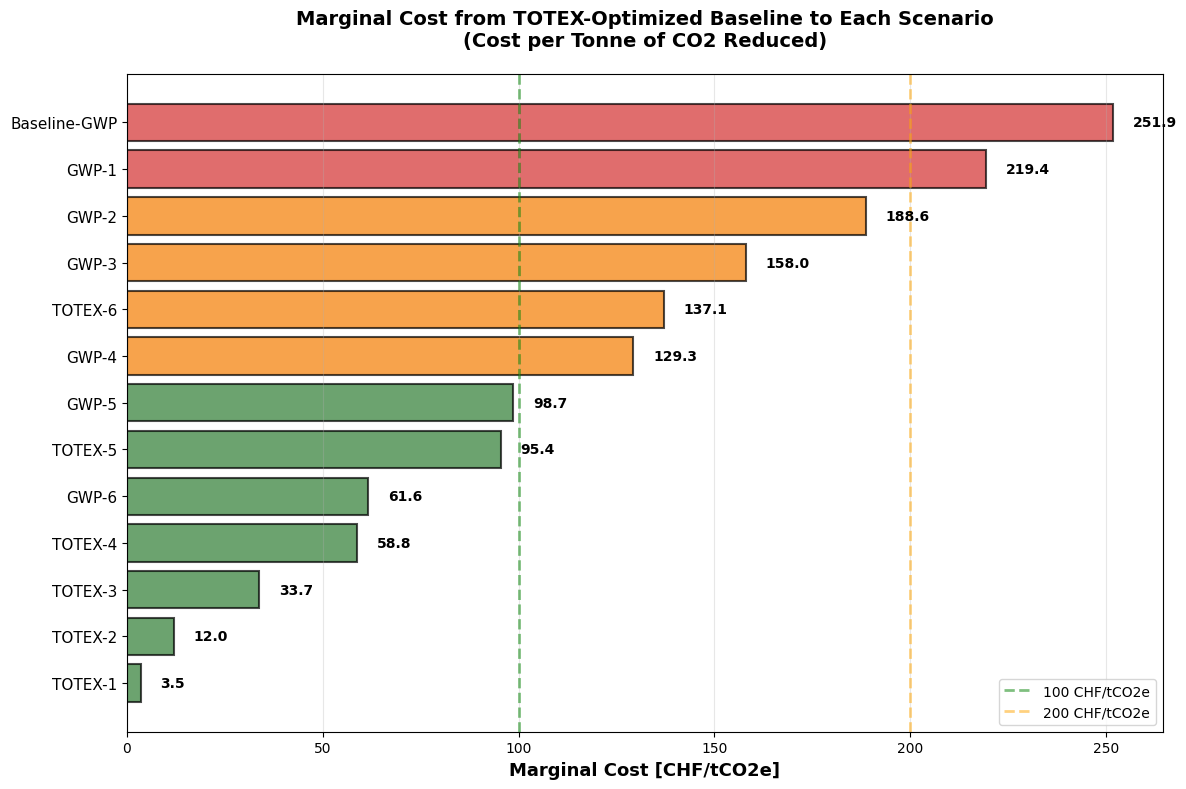

Graph saved as: marginal_cost_graph.png


In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = final_df

# Extract all scenarios with their TOTEX and GWP values
scenarios = []
totex_values = []
gwp_values = []
scenario_labels = []

columns = df.columns.tolist()
for col in columns[1:]:
    if col != 'Category':
        totex_row = df[df['Category'] == 'TOTEX [MCHF/y]']
        gwp_row = df[df['Category'] == 'GWP_total [ktCO2e/y]']
        
        if not totex_row[col].isna().all() and not gwp_row[col].isna().all():
            totex_val = float(totex_row[col].values[0])
            gwp_val = float(gwp_row[col].values[0])
            
            totex_values.append(totex_val)
            gwp_values.append(gwp_val)
            scenarios.append(col)
            
            # Create readable labels
            if 'baseline_GWP' in col:
                scenario_labels.append('Baseline-GWP')
            elif 'baseline_TOTEX' in col:
                scenario_labels.append('Baseline-TOTEX')
            elif 'GWP' in col:
                num = col.split('_')[2]
                scenario_labels.append(f'GWP-{num}')
            elif 'TOTEX' in col:
                num = col.split('_')[2]
                scenario_labels.append(f'TOTEX-{num}')

# Create DataFrame
all_scenarios = pd.DataFrame({
    'Scenario': scenarios,
    'Label': scenario_labels,
    'TOTEX': totex_values,
    'GWP': gwp_values
})

# Sort by GWP (descending)
all_scenarios = all_scenarios.sort_values('GWP', ascending=False).reset_index(drop=True)

# Identify the TOTEX-optimized baseline
baseline_idx = all_scenarios['Label'].str.contains('Baseline-TOTEX').idxmax()
baseline = all_scenarios.iloc[baseline_idx]

# Calculate marginal costs from baseline to each scenario
marginal_data = []

for idx, row in all_scenarios.iterrows():
    if row['Label'] == baseline['Label']:
        continue
    
    totex_change = row['TOTEX'] - baseline['TOTEX']
    gwp_change = baseline['GWP'] - row['GWP']
    
    if gwp_change > 0:
        marginal_cost = (totex_change * 1000) / gwp_change  # Convert to CHF/tCO2e
        
        marginal_data.append({
            'Scenario': row['Label'],
            'Marginal_Cost': marginal_cost,
            'GWP_Reduction': gwp_change,
            'TOTEX_Increase': totex_change
        })

# Create DataFrame and sort by GWP reduction
marginal_df = pd.DataFrame(marginal_data)
marginal_df = marginal_df.sort_values('GWP_Reduction')

# Create the graph
fig, ax = plt.subplots(figsize=(12, 8))

# Color based on marginal cost ranges
colors = ['#2E7D32' if cost < 100 else '#F57C00' if cost < 200 else '#D32F2F' 
          for cost in marginal_df['Marginal_Cost']]

bars = ax.barh(range(len(marginal_df)), marginal_df['Marginal_Cost'], 
               color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

ax.set_yticks(range(len(marginal_df)))
ax.set_yticklabels(marginal_df['Scenario'], fontsize=11)
ax.set_xlabel('Marginal Cost [CHF/tCO2e]', fontsize=13, fontweight='bold')
ax.set_title('Marginal Cost from TOTEX-Optimized Baseline to Each Scenario\n(Cost per Tonne of CO2 Reduced)', 
             fontsize=14, fontweight='bold', pad=20)

# Add reference lines
ax.axvline(x=100, color='green', linestyle='--', alpha=0.5, linewidth=2, label='100 CHF/tCO2e')
ax.axvline(x=200, color='orange', linestyle='--', alpha=0.5, linewidth=2, label='200 CHF/tCO2e')
ax.legend(fontsize=10, loc='lower right')
ax.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (idx, row) in enumerate(marginal_df.iterrows()):
    ax.text(row['Marginal_Cost'] + 5, i, f"{row['Marginal_Cost']:.1f}", 
            va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('marginal_cost_graph.png', dpi=300, bbox_inches='tight')
plt.show()

print("Graph saved as: marginal_cost_graph.png")